In [231]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn 

DATA PRE-PROCESSING

In [232]:
#Read the data
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [233]:

df.shape

(195, 24)

In [234]:

df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

From the description above, we see that the data set contains 24 columns: one column is patient ID, one is Parkinson's status, and 22 columns are voice measurement features.
And 195 people in total.

DATA VISUALIZATION 

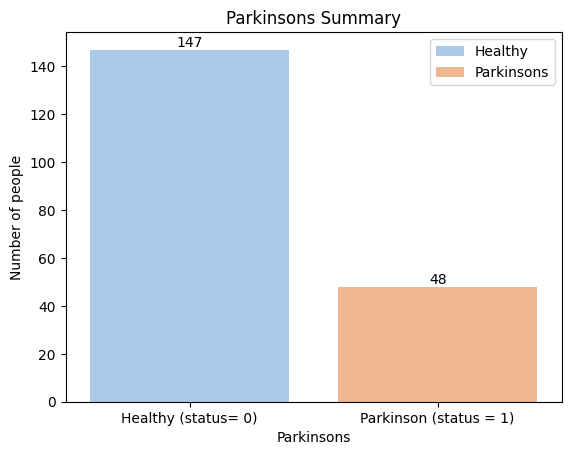

status
1    147
0     48
Name: count, dtype: int64


In [236]:
# Learn about how many people get Parkinsons #1, or healthy #0
# creating the bar plot
ax = seaborn.barplot(x=['Healthy (status= 0)', 'Parkinson (status = 1)'], y=df['status'].value_counts(), hue= ['Healthy', 'Parkinsons'], palette="pastel", legend=True)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Parkinsons Summary')
plt.xlabel('Parkinsons')
plt.ylabel('Number of people')

plt.show()
print(df.status.value_counts())

The result is 147 people get Parkinson's disease and 48 people are healthy.

Correlation matrix indicates the correlation among variables

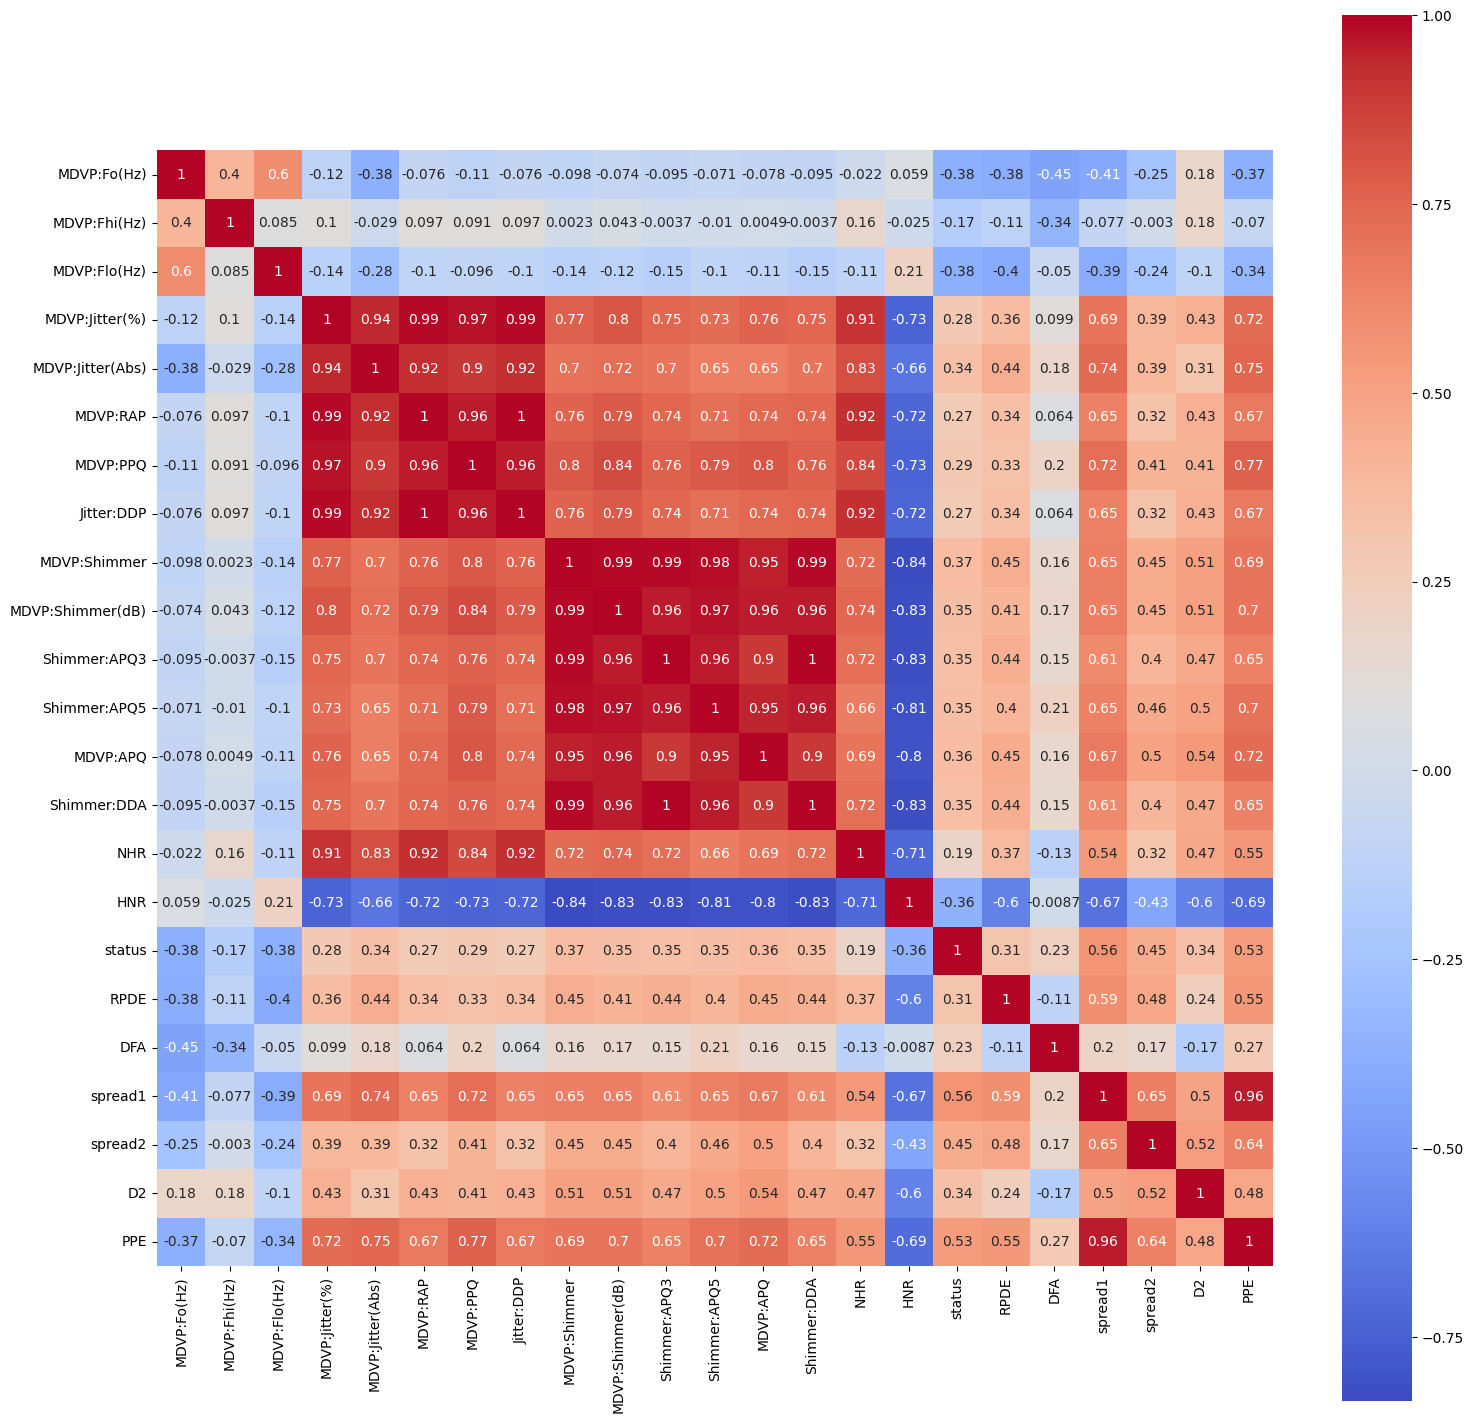

In [237]:
featureMeans = list(df.columns[1:])
plt.figure(figsize=(18,18))
seaborn.heatmap(df[featureMeans].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

From the correlation matrix above, we see that the following variables are highly correlated to each others and also significantly impact on the Parkinson's status.
MDVP:Jitter(%)-MDVP:Jitter(Abs)-MDVP:RAP-MDVP:PPQ-Jitter:DDP-MDVP:Shimmer-MDVP:Shimmer(dB)-Shimmer:APQ3-Shimmer:APQ5-MDVP:APQ-Shimmer:DDA-NHR	

The variables have highest influence to the Parkinson's status are: spread1, spread2 and PPE. Therefore, I will plot the distributions of these features to compare between Healthy and Parkinsons

/home/hp/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_68597/1816290774.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


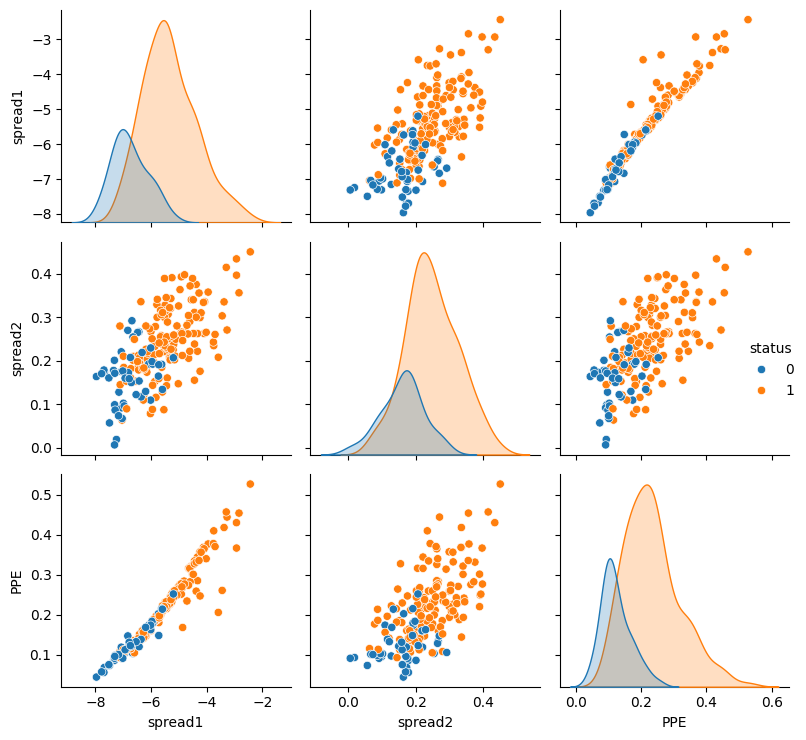

In [238]:
seaborn.pairplot(df, hue = 'status', vars = ['spread1', 'spread2', 'PPE'] )
plt.tight_layout()

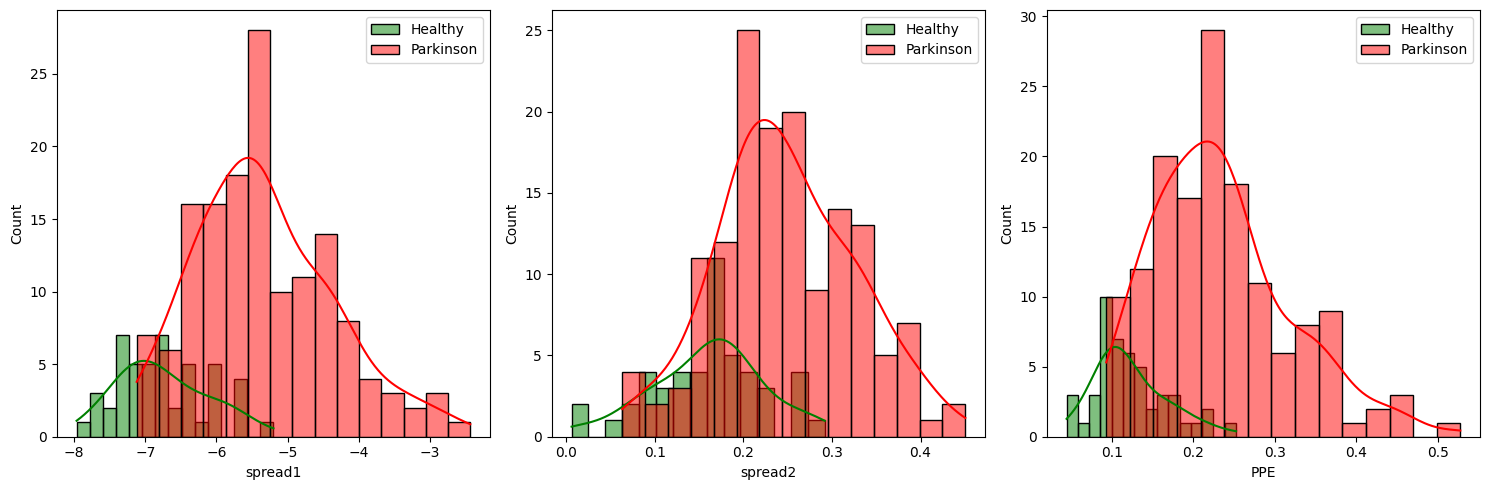

In [239]:
bins = 15
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
seaborn.histplot(df[df['status']==0]['spread1'], bins=bins, color='green', label='Healthy',  kde=True)
seaborn.histplot(df[df['status']==1]['spread1'], bins=bins, color='red', label='Parkinson',  kde=True)
plt.legend(loc='upper right')
plt.subplot(1, 3, 2)
seaborn.histplot(df[df['status']==0]['spread2'], bins=bins, color='green', label='Healthy',  kde=True)
seaborn.histplot(df[df['status']==1]['spread2'], bins=bins, color='red', label='Parkinson',  kde=True)
plt.legend(loc='upper right')
plt.subplot(1, 3, 3)
seaborn.histplot(df[df['status']==0]['PPE'], bins=bins, color='green', label='Healthy',  kde=True)
seaborn.histplot(df[df['status']==1]['PPE'], bins=bins, color='red', label='Parkinson',  kde=True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

******************** TRAINING MODELS *************************

In [240]:
#separate Parkinson's features and status.
features = df.loc[:,df.columns!='status'].values[:,1:]
status=df.loc[:,'status'].values


In [241]:
#split the dataset for training
x_train,x_test,y_train,y_test=train_test_split(features, status, test_size=0.2)
print(x_train, y_train)

[[119.031 127.533 109.216 ... 0.152941 2.328513 0.112856]
 [152.845 163.305 75.836 ... 0.203653 2.125618 0.1701]
 [229.401 252.221 221.156 ... 0.056844 2.003032 0.073581]
 ...
 [116.15 131.731 109.815 ... 0.23307 2.445646 0.184985]
 [117.274 129.916 110.402 ... 0.290024 2.021591 0.314464]
 [115.322 135.738 107.802 ... 0.226528 2.442906 0.238281]] [1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1]


Extreme Gradient Boosting Classifier

In [242]:
XGBC=XGBClassifier(n_estimators=100,learning_rate = 0.5, max_depth=5,random_state=0)
XGBC.fit(x_train,y_train)
XGBC_prediction=XGBC.predict(x_test)
XGBC_Accuracy_Score = metrics.accuracy_score(y_test, XGBC_prediction)*100

print("XGBC_Accuracy_Score = ", XGBC_Accuracy_Score)

XGBC_Accuracy_Score =  89.74358974358975


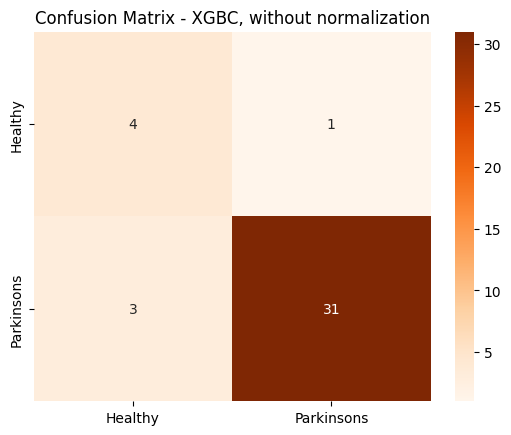

In [243]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_XGBC = confusion_matrix(y_test,XGBC_prediction)

seaborn.heatmap(cm_XGBC, annot=True,cmap="Oranges",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - XGBC, without normalization')
plt.show()

Gradient Boosting Classifier

In [244]:
GBClassifier=GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,max_depth=5,random_state=0)
GBClassifier.fit(x_train,y_train)
GBC_prediction = GBClassifier.predict(x_test)
GBC_Accuracy_Score = metrics.accuracy_score(y_test, GBC_prediction)*100

print("GBC_Accuracy_Score = ", GBC_Accuracy_Score)

GBC_Accuracy_Score =  89.74358974358975


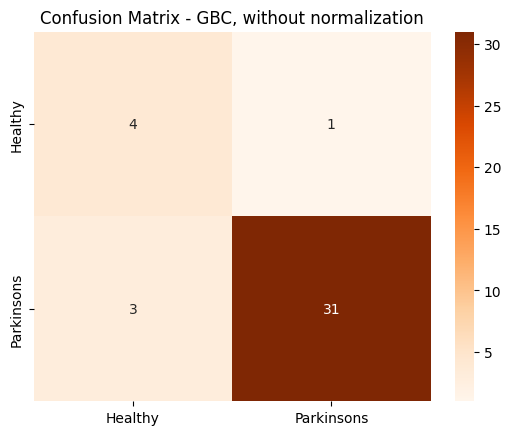

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_GBC = confusion_matrix(y_test,GBC_prediction)

seaborn.heatmap(cm_GBC, annot=True,cmap="Oranges",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - GBC, without normalization')
plt.show()

AdaBoost Classifier

In [246]:
AdaBoost=AdaBoostClassifier(n_estimators=100,learning_rate = 0.5, random_state=0)
AdaBoost.fit(x_train,y_train)
Ada_prediction = AdaBoost.predict(x_test)
AdaBoost_Accuracy_Score = metrics.accuracy_score(y_test, Ada_prediction)*100

print("AdaBoost_Accuracy_Score = ", AdaBoost_Accuracy_Score)

AdaBoost_Accuracy_Score =  89.74358974358975


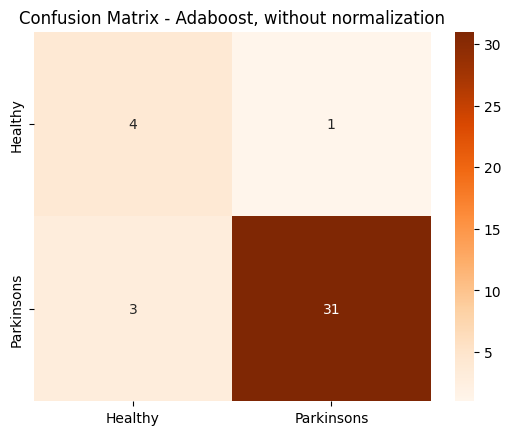

In [247]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_Ada = confusion_matrix(y_test,Ada_prediction)

seaborn.heatmap(cm_Ada, annot=True,cmap="Oranges",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - Adaboost, without normalization')
plt.show()

Decision Tree

In [248]:
Tree=DecisionTreeClassifier(random_state=0)
Tree.fit(x_train,y_train)
Tree_prediction = Tree.predict(x_test)
Tree_Accuracy_Score = metrics.accuracy_score(y_test, Tree_prediction)*100

print("Tree_Accuracy_Score = ", Tree_Accuracy_Score)

Tree_Accuracy_Score =  84.61538461538461


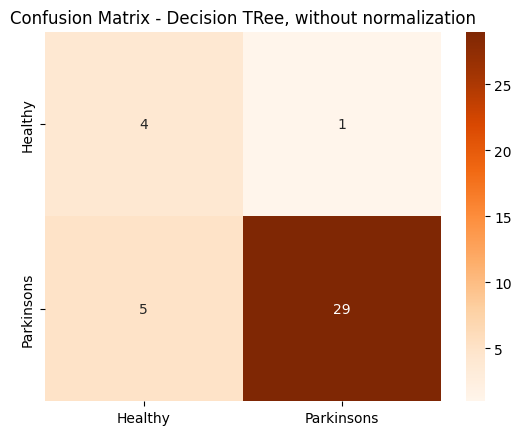

In [249]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_Tree = confusion_matrix(y_test, Tree_prediction)

seaborn.heatmap(cm_Tree, annot=True,cmap="Oranges",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - Decision TRee, without normalization')
plt.show()

Logistic Regression

In [250]:
LogisticReg = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)
Log_prediction = LogisticReg.predict(x_test)
Log_Accuracy_Score = metrics.accuracy_score(y_test, Log_prediction)*100

print("Log_Accuracy_Score = ", Log_Accuracy_Score)

Log_Accuracy_Score =  84.61538461538461


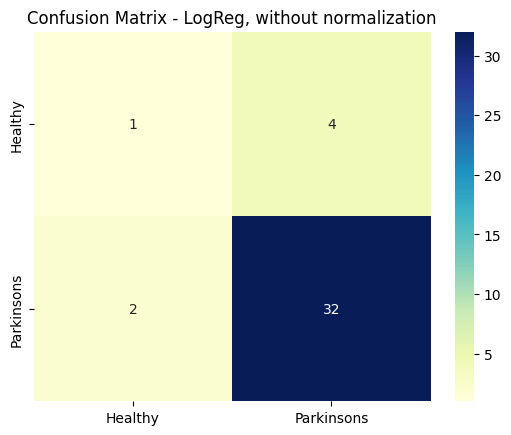

In [251]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_Log = confusion_matrix(y_test,SVM_prediction)

seaborn.heatmap(cm_Log, annot=True,cmap="YlGnBu",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - LogReg, without normalization')
plt.show()

KNN

In [252]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)
KNN_prediction = KNN.predict(x_test)

KNN_Accuracy_Score = metrics.accuracy_score(y_test, KNN_prediction)*100

print("Accuracy score = ", KNN_Accuracy_Score)

Accuracy score =  82.05128205128204


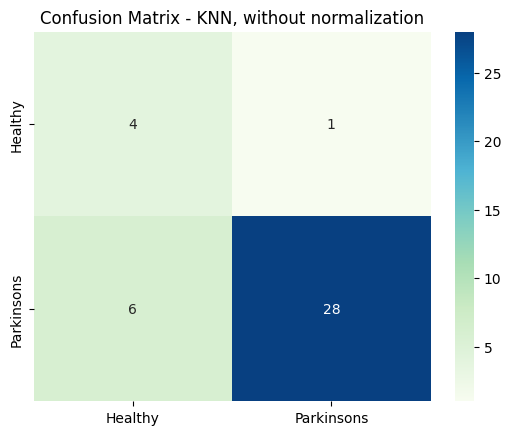

In [253]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_KNN = confusion_matrix(y_test,KNN_prediction)

seaborn.heatmap(cm_KNN, annot=True,cmap="GnBu",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - KNN, without normalization')
plt.show()


SVM

In [254]:
SVM = svm.SVC().fit(x_train, y_train)
SVM_prediction = SVM.predict(x_test)
SVM_Accuracy_Score = metrics.accuracy_score(y_test, SVM_prediction)*100

print("Accuracy score = ", SVM_Accuracy_Score)

Accuracy score =  92.3076923076923


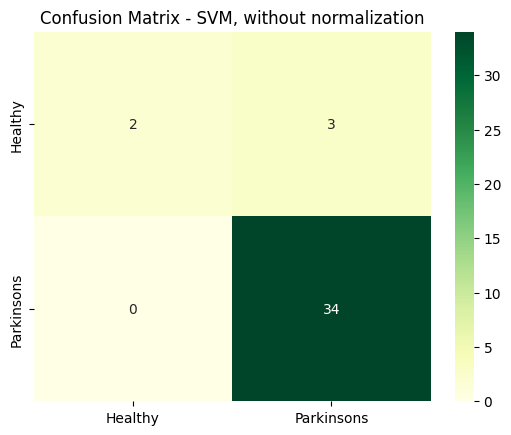

In [255]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_SVM = confusion_matrix(y_test,SVM_prediction)

seaborn.heatmap(cm_SVM, annot=True,cmap="YlGn",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - SVM, without normalization')
plt.show()

Random Forest Classifier

RFC Accuracy score =  87.17948717948718


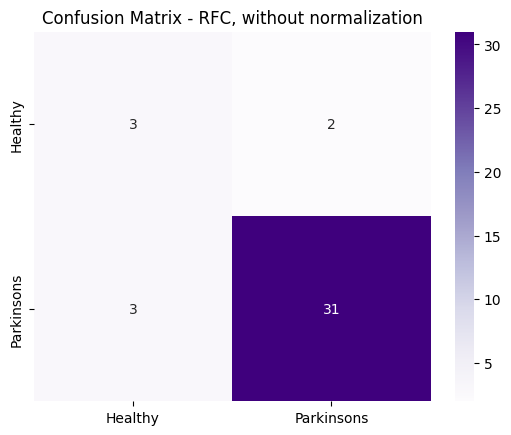

In [256]:
RFC = RandomForestClassifier().fit(x_train, y_train)
RFC_prediction = RFC.predict(x_test)
RFC_Accuracy_Score = metrics.accuracy_score(y_test, RFC_prediction)*100

print("RFC Accuracy score = ", RFC_Accuracy_Score)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm_RFC = confusion_matrix(y_test, RFC_prediction)

seaborn.heatmap(cm_RFC, annot=True,cmap="Purples",  cbar=True,
            xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

plt.title('Confusion Matrix - RFC, without normalization')
plt.show()

Compare the confusion matrices of all models. Here, there are 20% of the data set are tested, namely 39 people.

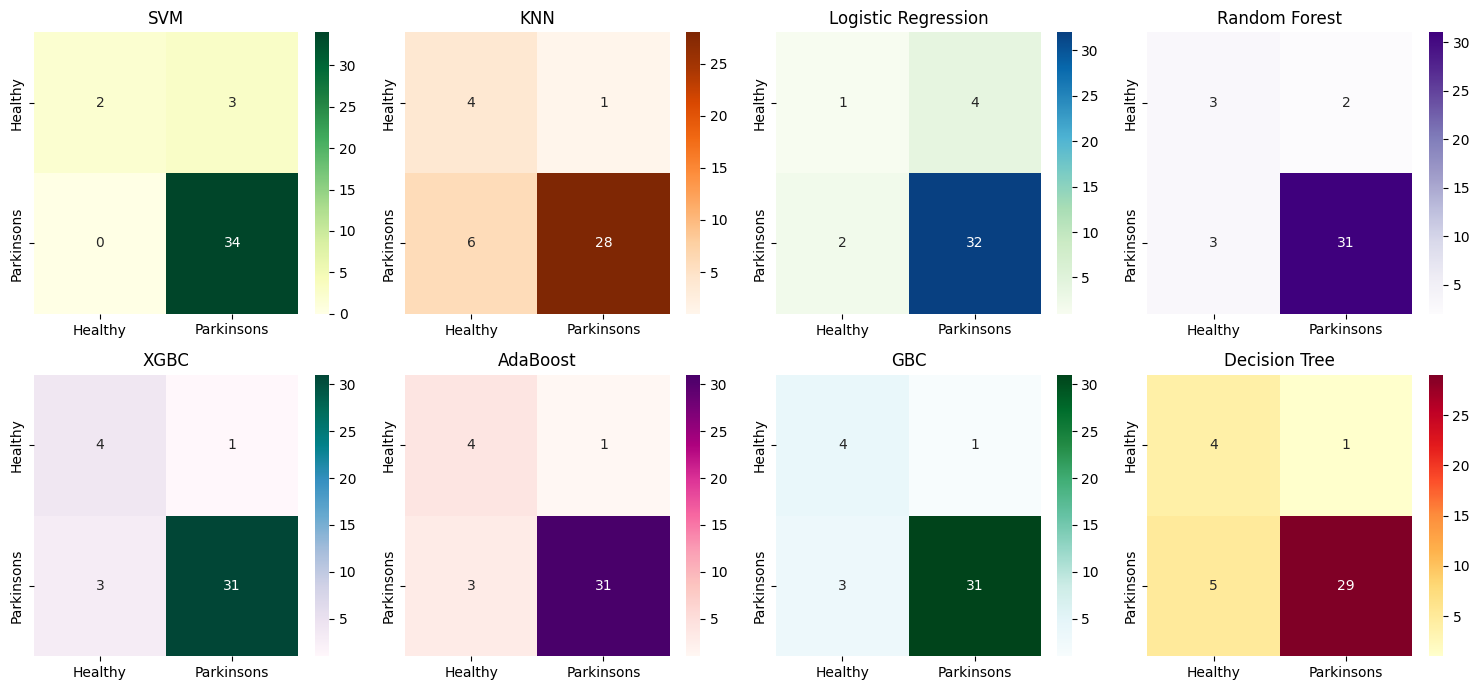

In [257]:
fig, axs = plt.subplots(2, 4, figsize=(15, 7))

axs[0, 0].set_title("SVM")
seaborn.heatmap(cm_SVM, annot=True,cmap="YlGn", ax=axs[0, 0], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[0, 1].set_title("KNN")
seaborn.heatmap(cm_KNN, annot=True,cmap="Oranges", ax=axs[0, 1], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[0, 2].set_title("Logistic Regression")
seaborn.heatmap(cm_Log, annot=True,cmap="GnBu", ax=axs[0, 2], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[0, 3].set_title("Random Forest")
seaborn.heatmap(cm_RFC, annot=True,cmap="Purples", ax=axs[0, 3], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[1, 0].set_title("XGBC")
seaborn.heatmap(cm_XGBC, annot=True,cmap="PuBuGn", ax=axs[1, 0], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[1, 1].set_title("AdaBoost")
seaborn.heatmap(cm_Ada, annot=True,cmap="RdPu", ax=axs[1, 1], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[1, 2].set_title("GBC")
seaborn.heatmap(cm_GBC, annot=True,cmap="BuGn", ax=axs[1, 2], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

axs[1, 3].set_title("Decision Tree")
seaborn.heatmap(cm_Tree, annot=True,cmap="YlOrRd", ax=axs[1, 3], cbar=True, xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])

fig.tight_layout()
plt.show()

********************** Compare the accuracies amongst all models *********

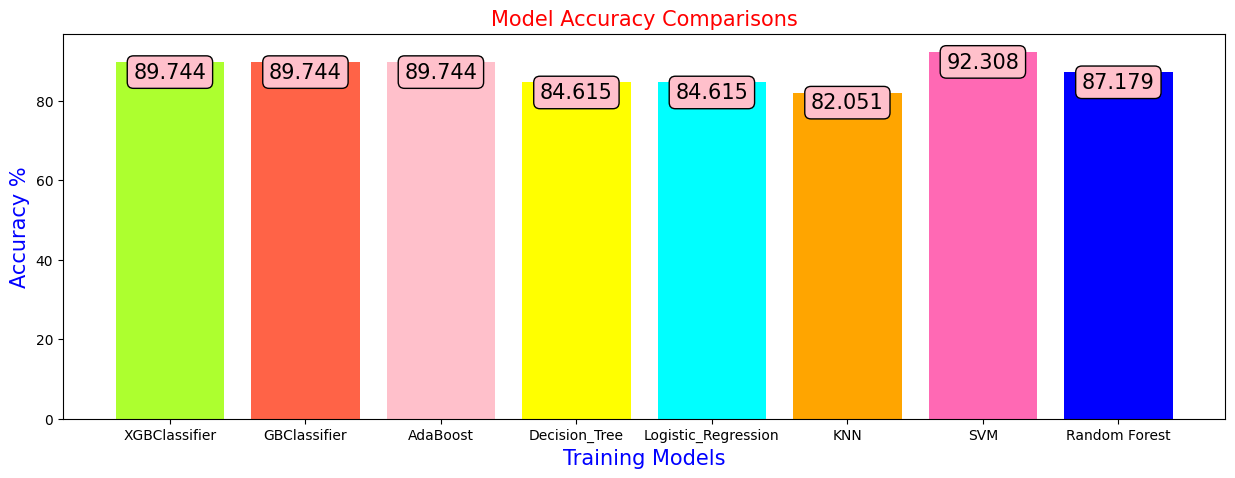

In [258]:
models = ['XGBClassifier','GBClassifier','AdaBoost','Decision_Tree','Logistic_Regression', 'KNN', 'SVM', 'Random Forest']
scores = [XGBC_Accuracy_Score, GBC_Accuracy_Score, AdaBoost_Accuracy_Score, Tree_Accuracy_Score, Log_Accuracy_Score, KNN_Accuracy_Score, SVM_Accuracy_Score, 
          RFC_Accuracy_Score]

plt.figure(figsize=(15,5))
plt.bar(models, scores, color=['greenyellow','tomato','pink', 'yellow', 'cyan','orange','hotpink', 'blue'])

plt.title('Model Accuracy Comparisons', fontsize=15, color='red')
plt.xlabel('Training Models',fontsize=15,  color='blue')
plt.ylabel('Accuracy %', fontsize=15, color='blue') 

text_kwargs = dict(ha='center', va='top', fontsize=15, color='black')

for i, values in enumerate(scores):
    plt.text(i, values, str(round(values,3)), **text_kwargs, bbox = dict(facecolor='pink', edgecolor='black',boxstyle="round"))

plt.show()

CONCLUSION:
In this project, there are 8 Machine Learning Classifier algorithms used to train the dataset,  which consists of 22 attributes. These algorithms give relative good prediction about the disease. While Support Vector Machine gives the most precise detection of the Parkinson's disease, K-Nearest Neighbors provides a pretty poor accuracy. 